In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

ROOT = 'data'
CLASS_NAME = sorted(list(os.listdir(f'{ROOT}/train')))

def read_image_from_path(path, size):
    img = Image.open(path).convert('RGB').resize(size)
    return np.array(img)

def folder_to_images(folder, size):
    list_dir = [folder + '/' + name for name in os.listdir(folder)]
    images_np = np.zeros(shape=(len(list_dir), *size, 3))
    images_path = []

    for i, path in enumerate(list_dir):
        images_np[i] = read_image_from_path(path, size)
        images_path.append(path)
    images_path = np.array(images_path)
    return images_np, images_path

def plot_results(query_path, ls_path_score, reverse):
    fig = plt.figure()
    fig.add_subplot(2, 2, 1)
    plt.imshow(read_image_from_path(query_path, size=(256, 256)))
    plt.title(f"Query Image: {query_path.split('/')[2]}")
    plt.axis("off")

    for i, path in enumerate(sorted(ls_path_score, key=lambda x: x[1], reverse=reverse)[:3], 2):
        fig.add_subplot(2, 2, i)
        plt.imshow(read_image_from_path(path[0], size=(256, 256)))
        plt.title(f"Top {i-1}: {path[0].split('/')[2]}")
        plt.axis("off")
    plt.show()

#### Absolute Difference

In [2]:
def absolute_difference(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    return np.sum(np.abs(data - query), axis=axis_batch_size)

def mean_square_difference(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    return np.mean((data - query)**2, axis=axis_batch_size)

def cosine_similarity(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    query_norm = np.sqrt(np.sum(query**2))
    data_norm = np.sqrt(np.sum(data**2, axis=axis_batch_size))
    return np.sum(data * query, axis=axis_batch_size) / (query_norm * data_norm + np.finfo(float).eps)

def correlation_coefficient(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    query_mean = query - np.mean(query)
    data_mean = data - np.mean(data, axis=axis_batch_size, keepdims=True)
    query_norm = np.sqrt(np.sum(query_mean**2))
    data_norm = np.sqrt(np.sum(data_mean**2, axis=axis_batch_size))
    return np.sum(data_mean * query_mean, axis=axis_batch_size) / (query_norm*data_norm + np.finfo(float).eps)

In [3]:
def get_ls_score(root_img_path, query_path, size, metric):
    query = read_image_from_path(query_path, size)
    ls_path_score = []

    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)
            rates = metric(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

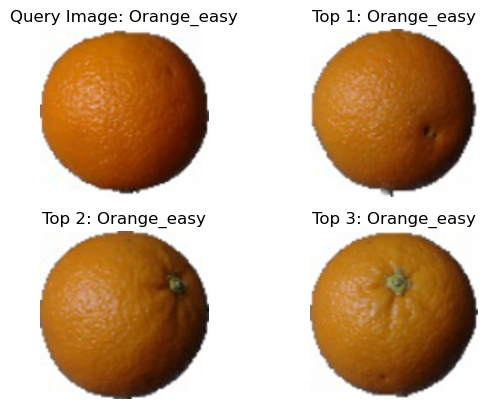

In [4]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (256, 256)
query, ls_path_score = get_ls_score(root_img_path, query_path, size, absolute_difference)
plot_results(query_path, ls_path_score, reverse=False)

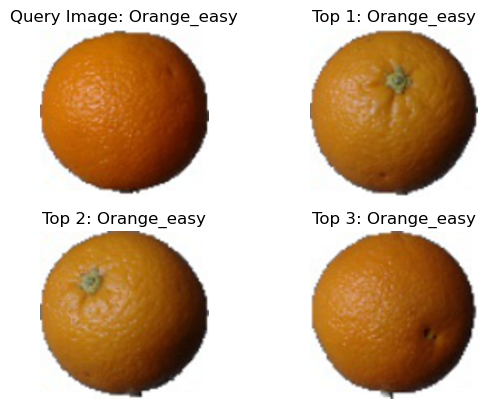

In [5]:
query, ls_path_score = get_ls_score(root_img_path, query_path, size, mean_square_difference)
plot_results(query_path, ls_path_score, reverse=False)

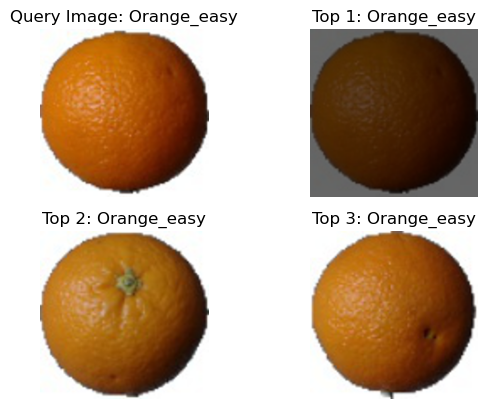

In [6]:
query, ls_path_score = get_ls_score(root_img_path, query_path, size, cosine_similarity)
plot_results(query_path, ls_path_score, reverse=True)

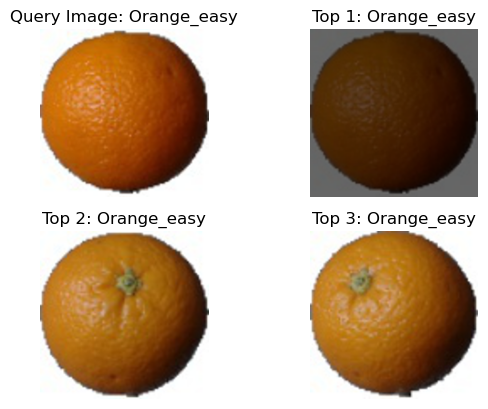

In [7]:
query, ls_path_score = get_ls_score(root_img_path, query_path, size, correlation_coefficient)
plot_results(query_path, ls_path_score, reverse=True)